In [184]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import proplot
import numpy as np
import geopandas as gpd
import pickle
from tqdm import tqdm

In [185]:
filename = 'coord_class_cantons/coord_class.pickle'
with open(filename, 'rb') as f:
    data = pickle.load(f)

In [186]:
print(data)

            East      North   Class
0      2474500.0  1064500.0  Forest
1      2474500.0  1065500.0    Rock
2      2474500.0  1066500.0  Forest
3      2474500.0  1067500.0  Forest
4      2474500.0  1068500.0  Forest
...          ...        ...     ...
88792  2843500.0  1296500.0  Forest
88793  2843500.0  1297500.0  Forest
88795  2843500.0  1299500.0  Forest
88796  2843500.0  1300500.0  Forest
88799  2843500.0  1303500.0  Forest

[53664 rows x 3 columns]


In [187]:
print(data.Class.unique())
print(data.head())

['Forest' 'Rock' 'Lake' 'Reservoir' 'Siedl' 'Vines' 'Swamp' 'Orchard'
 'Scree' 'City Center' 'Glacier']
        East      North   Class
0  2474500.0  1064500.0  Forest
1  2474500.0  1065500.0    Rock
2  2474500.0  1066500.0  Forest
3  2474500.0  1067500.0  Forest
4  2474500.0  1068500.0  Forest


In [188]:
df_Rock = data[data.Class == 'Rock'].reset_index().drop('index', axis=1)
df_Vege = data[data.Class.isin(['Forest','Scree'])].reset_index().drop('index', axis=1)
df_City = data[data.Class == 'City Center'].reset_index().drop('index', axis=1)
df_Water = data[data.Class == 'Reservoir'].reset_index().drop('index', axis=1)
df_Fields = data[data.Class.isin(['Siedl','Vines'])]
print(f"Rock : {str(len(df_Rock))}")
print(f"Vege : {str(len(df_Vege))}")
print(f"Cities : {str(len(df_City))}")
print(f"Water : {str(len(df_Water))}")
print(f"Fields : {str(len(df_Fields))}")
print(df_City)

Rock : 8464
Vege : 33926
Cities : 13
Water : 168
Fields : 6909
         East      North        Class
0   2493500.0  1232500.0  City Center
1   2500500.0  1117500.0  City Center
2   2538500.0  1152500.0  City Center
3   2556500.0  1276500.0  City Center
4   2592500.0  1288500.0  City Center
5   2600500.0  1199500.0  City Center
6   2607500.0  1228500.0  City Center
7   2611500.0  1267500.0  City Center
8   2634500.0  1244500.0  City Center
9   2681500.0  1224500.0  City Center
10  2683500.0  1247500.0  City Center
11  2730500.0  1280500.0  City Center
12  2751500.0  1079500.0  City Center


In [189]:
def open_monthly_data_var(var):
    try:
        data_var = xr.open_dataset(fr'./data/adjusted/{var}_1961_2023_monthly.nc')[var] # open the saved data
    except:
        data_var = xr.open_dataset(fr'./data/adjusted/{var}_1971_2023_monthly.nc')[var] # open the saved data

    return data_var

In [190]:
def resample_monthly_to_seasonal(data_var, resample_by='mean'):
    if resample_by=='mean':
        data_resampled = data_var.resample(time='QS-DEC').mean().mean(dim=['E', 'N']) # resample seasonally and then get the mean across E-N
    elif resample_by=='sum':
        data_resampled = data_var.resample(time='QS-DEC').sum().mean(dim=['E', 'N']) # resample seasonally and then get the mean across E-N
    return data_resampled

In [191]:
data = open_monthly_data_var('TabsM')
print(data)
data = resample_monthly_to_seasonal(data, 'mean')
print(data)

<xarray.DataArray 'TabsM' (time: 753, N: 240, E: 370)>
[66866400 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1961-01-01 1961-02-01 ... 2023-09-01
  * E        (E) float64 2.474e+06 2.476e+06 2.476e+06 ... 2.842e+06 2.844e+06
    lon      (N, E) float32 ...
    lat      (N, E) float32 ...
  * N        (N) float64 1.064e+06 1.066e+06 1.066e+06 ... 1.302e+06 1.304e+06
Attributes:
    units:         degree
    grid_mapping:  swiss_lv95_coordinates
    long_name:     monthly mean temperature
    grid_name:     ch01r.swiss.lv95
    version:       v1.4
    prod_date:     2021-09-02 02:56:17
<xarray.DataArray 'TabsM' (time: 252)>
array([-1.5136213 ,  4.5513744 , 11.848198  ,  6.684089  , -2.656995  ,
        1.5301508 , 12.109572  ,  4.79906   , -7.2327323 ,  3.1642077 ,
       11.94968   ,  6.2017536 , -3.421802  ,  4.180929  , 12.928686  ,
        5.1778955 , -4.6067414 ,  2.434719  , 11.292017  ,  4.5708766 ,
       -1.94909   ,  3.5877419 , 11.293719  ,  5.54

In [192]:
Tabs = open_monthly_data_var('TabsM')
print(Tabs.isel(time=(Tabs.time.dt.season == 'SON')))
print(Tabs)

<xarray.DataArray 'TabsM' (time: 187, N: 240, E: 370)>
[16605600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1961-09-01 1961-10-01 ... 2023-09-01
  * E        (E) float64 2.474e+06 2.476e+06 2.476e+06 ... 2.842e+06 2.844e+06
    lon      (N, E) float32 ...
    lat      (N, E) float32 ...
  * N        (N) float64 1.064e+06 1.066e+06 1.066e+06 ... 1.302e+06 1.304e+06
Attributes:
    units:         degree
    grid_mapping:  swiss_lv95_coordinates
    long_name:     monthly mean temperature
    grid_name:     ch01r.swiss.lv95
    version:       v1.4
    prod_date:     2021-09-02 02:56:17
<xarray.DataArray 'TabsM' (time: 753, N: 240, E: 370)>
[66866400 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1961-01-01 1961-02-01 ... 2023-09-01
  * E        (E) float64 2.474e+06 2.476e+06 2.476e+06 ... 2.842e+06 2.844e+06
    lon      (N, E) float32 ...
    lat      (N, E) float32 ...
  * N        (N) float64 1.064e+06 1.066e+06 1.066e+06 ...

In [193]:
def get_seasonal_time_series(data_resampled, season=12):
    """
    data_resampled: data that is seasonally resampled
    season: either 12,3,6,9 corresponding to DJF,MAM,JJA,SON
    """
    data_resampled_season = data_resampled.time.dt.month.isin(season)
    return data_resampled[data_resampled_season]

In [194]:
def mean_val_per_landuse(data, df_landuse, season):
    result = np.zeros((1,len(data)))
    for idx,val in df_landuse.iterrows():
        data = data.resample(time='QS-DEC').mean()
        tabs = data.isel(time=(data.time.dt.season == season)).sel(E=val.East, N=val.North).values
        #times = data.isel(time=(data.time.dt.season == season)).sel(E=val.East, N=val.North).time
        result = tabs.reshape((1,-1)) if idx == 0 else np.concatenate([result, tabs.reshape((1,-1))], axis=0)

    result = result[~np.isnan(result)].reshape((-1, result.shape[1]))
    result = np.mean(result, axis=0)

    return result
cities = mean_val_per_landuse(open_monthly_data_var('TabsM'), df_City, 'DJF')
print(len(cities))

63


In [195]:
print(df_Rock.sample(n=3, random_state=42).reset_index().drop('index', axis=1))

        East      North Class
0  2632500.0  1158500.0  Rock
1  2712500.0  1135500.0  Rock
2  2562500.0  1112500.0  Rock


In [196]:
season_val_map = {12:'DJF',
                  3: 'MAM',
                  6: 'JJA',
                  9: 'SON'}

color_map = ['#00ced1', '#ffa500', '#00ff00', '#0000ff', '#ff1493']
landuses = ['Rocks', 'Vegetation', 'Cities','Water', 'Fields']
#landuses = ['Cities','Water']
df_landuses = {
    'Rocks': df_Rock.sample(n=100, random_state=42).reset_index().drop('index', axis=1),
    'Vegetation': df_Vege.sample(n=100, random_state=42).reset_index().drop('index', axis=1),
    'Cities': df_City,
    'Water': df_Water.sample(n=100, random_state=42).reset_index().drop('index', axis=1),
    'Fields': df_Fields.sample(n=100, random_state=42).reset_index().drop('index', axis=1),
}

C:\Users\swann\AppData\Local\Temp\ipykernel_13012\2236090832.py:54: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  axs.set_xlabel('Years', fontsize=12, fontweight='bold')
C:\Users\swann\AppData\Local\Temp\ipykernel_13012\2236090832.py:55: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  axs.set_ylabel('Temperature [°C]', fontsize=12, fontweight='bold')
C:\Users\swann\AppData\Local\Temp\ipykernel_13012\2236090832.py:56: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  axs.set_xlim(1960, 2023)
C:\Users\swann\AppData\Local\Temp\ipykernel_13012\2236090832.py:57: ProplotWarning: Calling arbitra

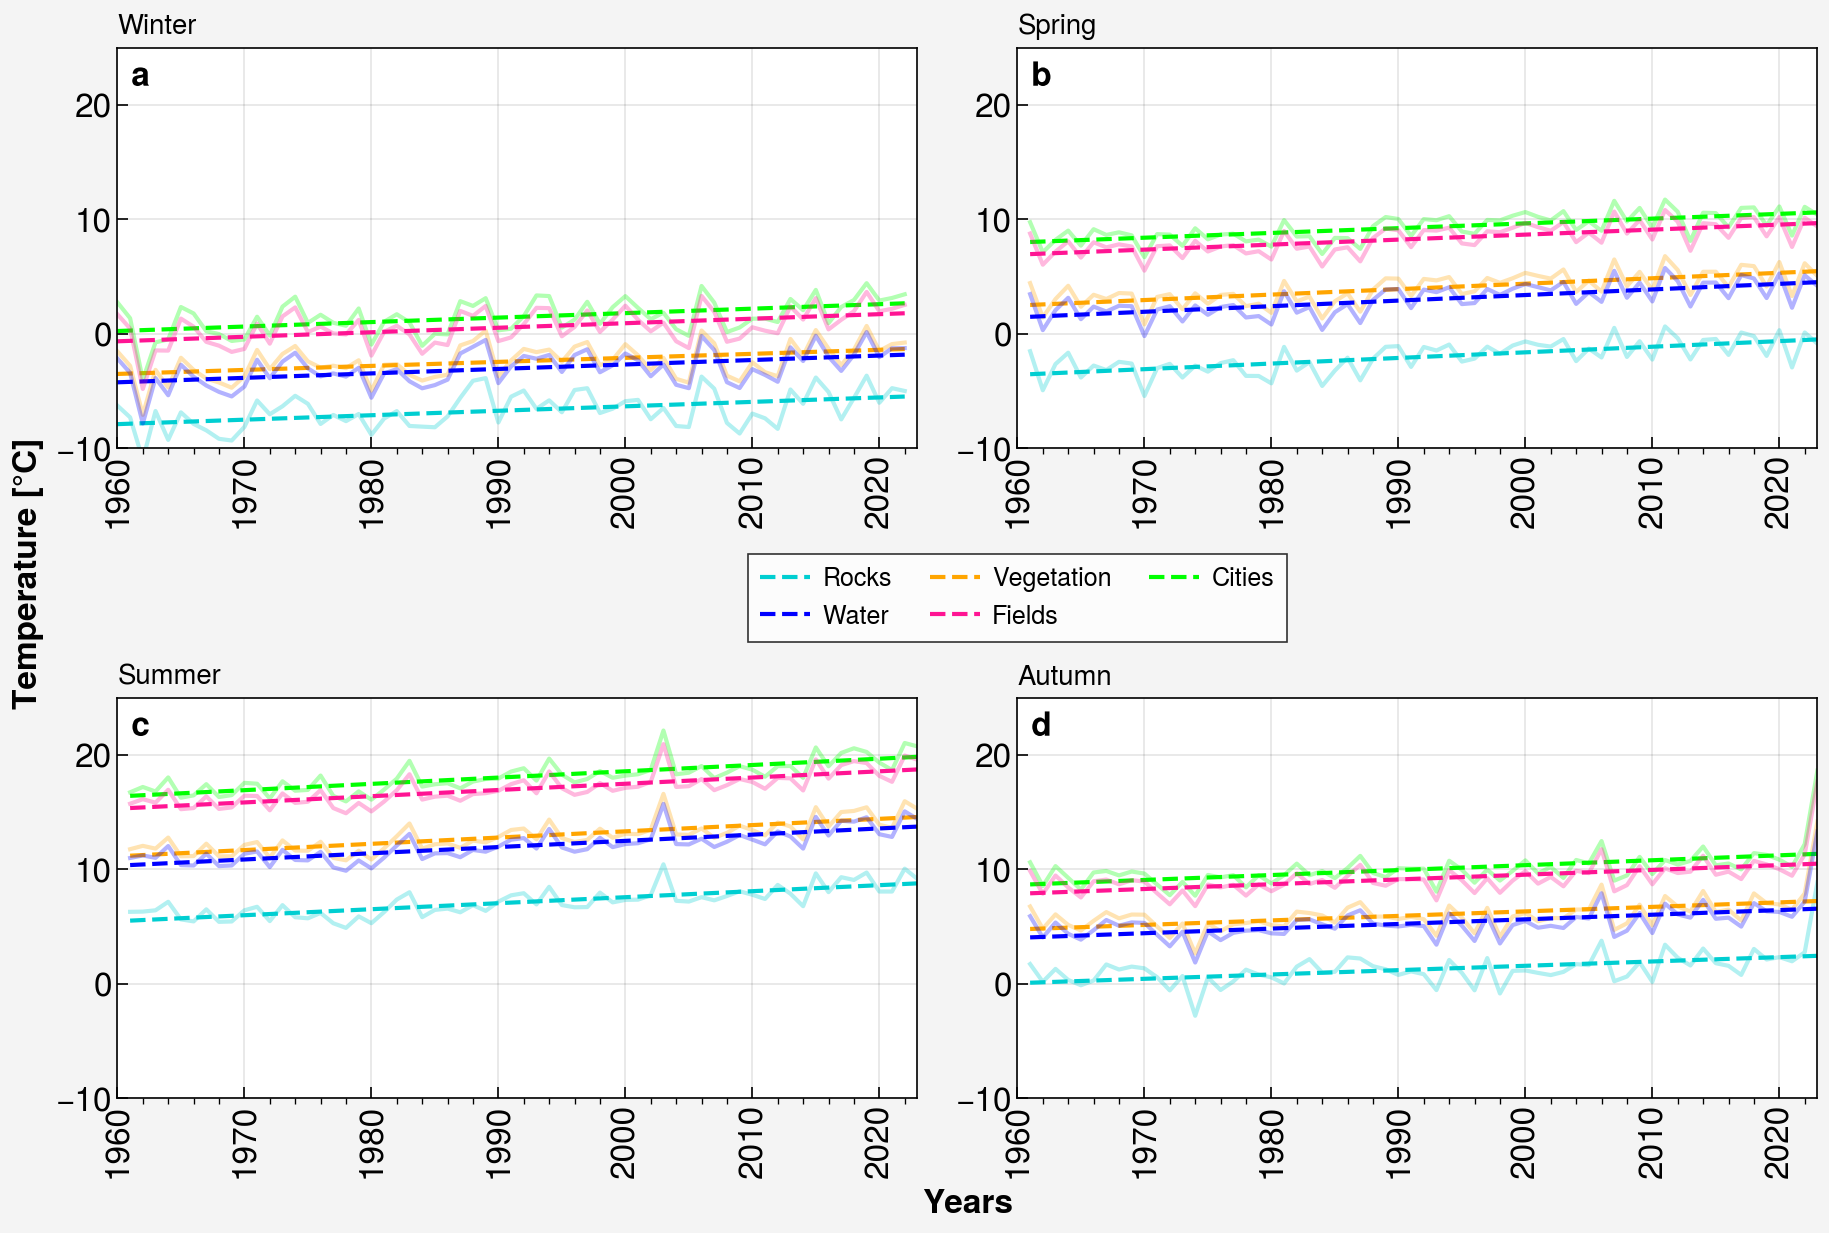

In [197]:
fig_array = [[1,2],
             [3,4]]

fig, axs = proplot.subplots(fig_array, 
                            axwidth=4,
                            axheight=2,
                            hratios=tuple(np.ones(len(fig_array), dtype=int)),
                            includepanels=True,
                            hspace=10,
                            wspace=4,
                            sharey=1,
                            sharex=1)

turn = 0
season_grid = [[12,3],[6,9]]
var_season_time_series = {}
var_season_values = {}
for turn in range(2):
    for season_val, i in zip(season_grid[turn], fig_array[turn]):
        for idx, category in enumerate(landuses):
            #var_season_time_series[season_val_map[season_val]] = get_seasonal_time_series(ds_var_resampled, season_val) # create time-series for each season
            #ds_var = open_seasonal_data_rhires_region(season_val_map[season_val], category)
            ds_var = open_monthly_data_var('TabsM')
            ds_var_resampled = resample_monthly_to_seasonal(ds_var, 'mean') # resample data
            var_season_time_series[season_val_map[season_val]] = get_seasonal_time_series(ds_var_resampled, season_val) # create time-series for each season
            
            #print(var_season_time_series[season_val_map[season_val]])
            var_season_values[season_val_map[season_val]] = mean_val_per_landuse(ds_var, df_landuses[category], season_val_map[season_val])

            """print(len(var_season_time_series[season_val_map[season_val]]))
            print(var_season_time_series[season_val_map[season_val]])
            print(len(var_season_values))"""
            """ylim_min = var_season_time_series[season_val_map[season_val]].min().values-1 # for visualization purposes, could be changed
            ylim_max = var_season_time_series[season_val_map[season_val]].max().values+1 # for visualization purposes, could be changed"""
            """ylim_min = np.min(var_season_values[season_val_map[season_val]])
            ylim_max = np.max(var_season_values)"""
            xlim_min = int(var_season_time_series[season_val_map[season_val]].time.dt.year.min())
            xlim_max = int(var_season_time_series[season_val_map[season_val]].time.dt.year.max()) 
            """print(len(range(xlim_min,xlim_max+1)))"""
            a,b = np.polyfit(range(xlim_min,xlim_max+1), var_season_values[season_val_map[season_val]], 1) # fit least-squares polynomial line
            
            axs[i-1].line(range(xlim_min,xlim_max+1), a*range(xlim_min,xlim_max+1)+b, color=color_map[idx], linestyle='--', label=category)
            axs[i-1].plot(range(xlim_min,xlim_max+1), var_season_values[season_val_map[season_val]], color=color_map[idx], alpha=0.3, label='_nolegend_')
            
            axs[i-1].set_ylabel('') # make sure that y-labels are not seen at first
            #axs[i-1].set_ylim(ylim_min, ylim_max)

axs[0].format(titleloc='l', title='Winter', labelsize=12)
axs[1].format(titleloc='l', title='Spring', labelsize=12)
axs[2].format(titleloc='l', title='Summer', labelsize=12)
axs[3].format(titleloc='l', title='Autumn', labelsize=12)

axs.format(abc=True, abcloc='ul', abcsize=12)
axs.set_xlabel('Years', fontsize=12, fontweight='bold')
axs.set_ylabel('Temperature [°C]', fontsize=12, fontweight='bold')
axs.set_xlim(1960, 2023)
axs.set_ylim(-10, 25)

axs.grid(True)
axs.format(ytickminor=False, xtickminor=True)
axs.tick_params(axis='x', labelrotation=90)
axs.tick_params(axis='y', labelsize=12, direction="in",)
axs.tick_params(axis='x', labelsize=12, direction="in",)
plt.legend(loc='center', bbox_to_anchor=(0,1.25))
fig.tight_layout()

plt.savefig(r'sample_pics/seasonal_prec_per_landuse.png', bbox_inches='tight', optimize=True, progressive=True, dpi=1000)

In [361]:
print(var_season_time_series)

{}


# Shapefile plotting

In [159]:
shapefile = gpd.read_file('./data/landuse/landuse_shp/swissTLMRegio_LandCover.shp')

<AxesSubplot:>

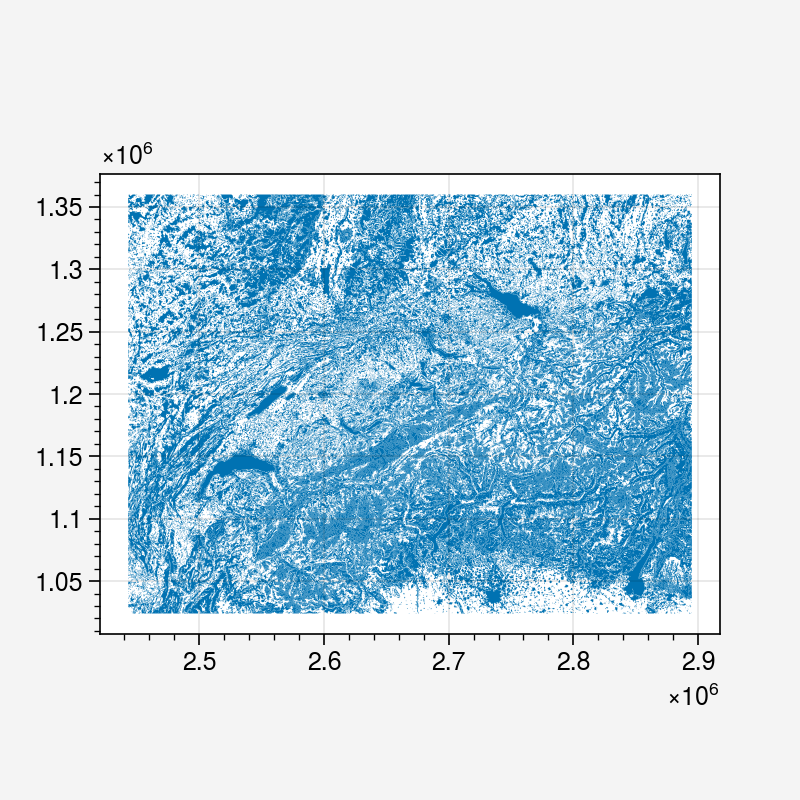

In [160]:
shapefile.plot()

In [161]:
color_map = ['#00ced1', '#ffa500', '#00ff00', '#0000ff', '#ff1493']
lst_landuse = {
    'Rocks': ['Rock'],
    'Vegetation': ['Forest','Scree'],
    'Cities': ['City Center'],
    'Water': ['Reservoir', 'Lake'],
    'Fields':['Siedl','Vines'],
}

In [162]:
for i,(key,v)in enumerate(lst_landuse.items()):
    print(i, key, v)

0 Rocks ['Rock']
1 Vegetation ['Forest', 'Scree']
2 Cities ['City Center']
3 Water ['Reservoir', 'Lake']
4 Fields ['Siedl', 'Vines']


## Change names from german to english in shapefile

In [163]:
lst_names_german = ['Wald', 'Sumpf', 'Fels', 'Geroell', 'Gletscher', 'See', 'Stausee', 'Reben', 'Siedl', 'Obstanlage', 'Stadtzentr']
lst_names_english = ['Forest', 'Swamp', 'Rock', 'Scree', 'Glacier', 'Lake', 'Reservoir', 'Vines', 'Siedl', 'Orchard', 'City Center']
for idx, lu in enumerate(lst_names_german):
    shapefile.loc[shapefile['OBJVAL'] == lu, 'OBJVAL'] = lst_names_english[idx]

In [164]:
print(shapefile.columns)
print(shapefile.OBJVAL.unique())

Index(['OBJORIG_YE', 'OBJORIG', 'OBJECTID', 'DATEOFCHNG', 'NAMN1', 'NAMN2',
       'UUID', 'OBJVAL', 'NLN1', 'NLN2', 'geometry'],
      dtype='object')
['Forest' 'Swamp' 'Rock' 'Scree' 'Glacier' 'Lake' 'Reservoir' 'Vines'
 'Siedl' 'Orchard' 'City Center']


In [165]:
shapefile['Color'] = 'white'
for idx, (key,lu) in enumerate(lst_landuse.items()):
    shapefile.loc[shapefile['OBJVAL'].isin(lu), 'Color'] = color_map[idx]
print(shapefile.head())

  OBJORIG_YE OBJORIG  OBJECTID  DATEOFCHNG NAMN1 NAMN2  \
0       2021  Divers         1  2021-02-24   N_A   N_A   
1       2023  Divers         2  2023-07-07   N_A   N_A   
2       2020     ERM         3  2021-04-21   N_A   N_A   
3       2012  Divers         4  2012-11-16   N_A   N_A   
4       2020     ERM         5  2021-02-24   N_A   N_A   

                                     UUID  OBJVAL NLN1 NLN2  \
0  {407D7BE5-EB27-400A-84CE-3D9829E5C443}  Forest  N_A  N_A   
1  {433FACE6-B7F9-4A59-A25A-6D661A017DF4}  Forest  N_A  N_A   
2  {FECB63C6-D8E7-4FF8-B89B-2E7322E05564}  Forest  N_A  N_A   
3  {96AADB46-9993-4DE0-9955-A9DDA431F09A}  Forest  N_A  N_A   
4  {B653B3F4-987E-4DDE-B6D6-34C8BC4C90BF}  Forest  N_A  N_A   

                                            geometry    Color  
0  POLYGON ((2628369.377 1324824.007, 2628718.628...  #ffa500  
1  POLYGON ((2623812.536 1320069.716, 2623906.958...  #ffa500  
2  POLYGON ((2470666.373 1331204.874, 2470832.736...  #ffa500  
3  POLYGON ((247

In [166]:
for idx, color in enumerate(color_map):
    print(list(lst_landuse)[idx])
    shapefile.loc[shapefile['Color']==color, 'OBJVAL'] = list(lst_landuse)[idx]

list_el = list(lst_landuse)
print(list_el)
list_other = [el for el in shapefile.OBJVAL.unique() if el not in list_el]
print(list_other)
shapefile.loc[shapefile['OBJVAL'].isin(list_other), 'OBJVAL'] = 'Other'
shapefile.loc[shapefile['OBJVAL'].isin(list_other), 'Color'] = 'Grey'


Rocks
Vegetation
Cities
Water
Fields
['Rocks', 'Vegetation', 'Cities', 'Water', 'Fields']
['Swamp', 'Glacier', 'Orchard']


In [178]:

color_dict = {
    'Rocks': '#00ced1',
    'Vegetation': '#ffa500',
    'Cities': '#00ff00',
    'Water': '#0000ff',
    'Fields':'#ff1493',
    'Other': '#555555',
}
print(color_dict.values())
color_map = ['#00ced1', '#ffa500', '#00ff00', '#0000ff', '#ff1493', '#555555']
color_map = ['#00ff00', '#ff1493', '#555555', '#00ced1','#ffa500','#0000ff']

dict_values(['#00ced1', '#ffa500', '#00ff00', '#0000ff', '#ff1493', '#555555'])


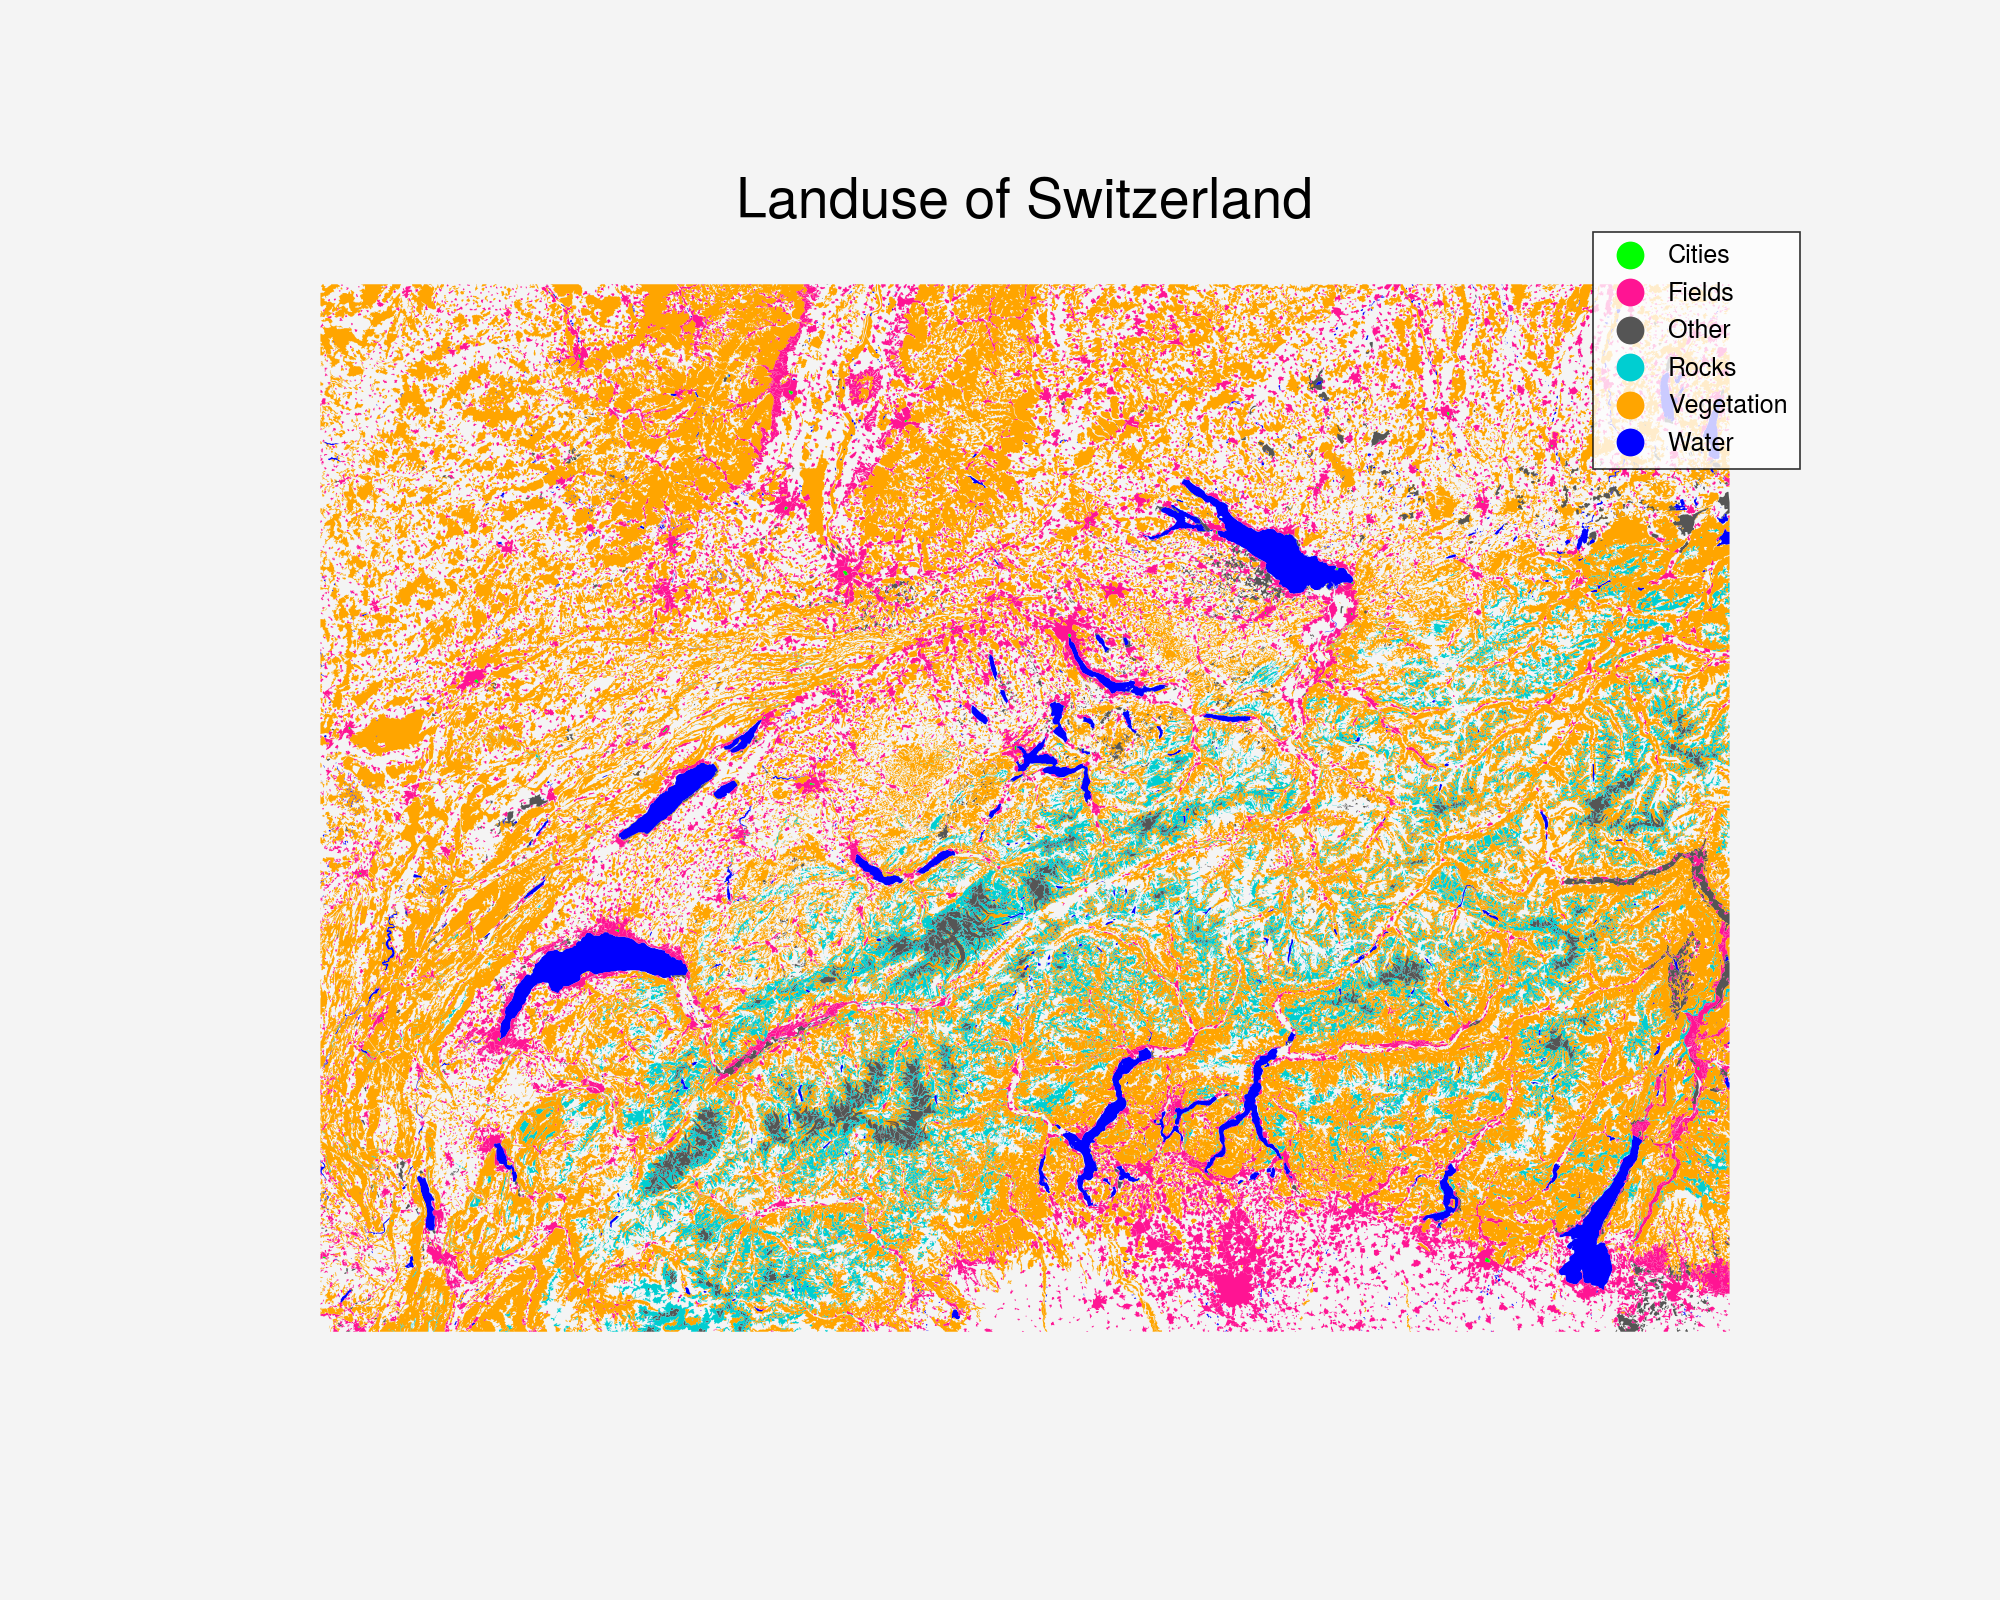

In [183]:

    import matplotlib.colors as colors
fig, ax = plt.subplots(figsize=(10,8))
shapefile.plot(column='OBJVAL', cmap=colors.ListedColormap(color_map), legend=True, ax=ax)
#shapefile.plot(column='OBJVAL', cmap=shapefile['Color'].unique(), legend=True, ax=ax)
#shapefile.plot(column='OBJVAL', legend=True, ax=ax)
"""shapefile['coords'] = shapefile['geometry'].apply(lambda x: x.representative_point().coords[:])
shapefile['coords'] = [coords[0] for coords in shapefile['coords']]
for idx, row in shapefile.iterrows():
    plt.annotate(text=row['OBJVAL'], xy=row['coords'],
                 horizontalalignment='center', fontsize=12, fontweight='bold')"""
plt.title('Landuse of Switzerland', fontdict={'fontsize':20})
plt.axis('off')
plt.grid(b=None)
plt.savefig(r'sample_pics/map_switzerland_landuses.png')